In [163]:
import numpy as np 
import pandas as pd 
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
color = sns.color_palette()
#from pandas.tools.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

In [164]:
train = pd.read_csv("C:/Users/Mrinal/Desktop/Forest/train.csv") # store as dataframe objects
test = pd.read_csv("C:/Users/Mrinal/Desktop/Forest/test.csv") # store as dataframe objects

In [165]:
train.sample(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3170,3171,2084,106,26,42,16,553,253,197,54,...,0,0,0,0,0,0,0,0,0,4
4375,4376,2990,344,23,488,169,509,169,199,165,...,0,0,0,0,0,0,0,0,0,2
11765,11766,3059,34,3,228,10,3185,219,232,149,...,0,0,0,0,0,0,0,0,0,1
2192,2193,2686,23,26,95,56,1283,195,176,107,...,0,1,0,0,0,0,0,0,0,6
142,143,2837,112,8,272,16,3649,235,231,128,...,0,0,0,0,0,0,0,0,0,2


In [166]:
test.sample(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
424031,439152,3056,295,7,30,1,2644,201,238,177,...,0,0,0,0,0,0,0,0,0,0
31631,46752,3091,57,19,30,8,4868,230,197,94,...,0,0,0,0,0,0,0,0,0,0
118083,133204,2753,77,20,660,129,1507,241,199,80,...,0,0,0,0,0,0,0,0,0,0
291900,307021,3051,191,12,30,-1,499,219,249,162,...,0,0,0,0,0,0,0,0,0,0
422177,437298,3262,135,12,534,223,3721,239,234,123,...,0,1,0,0,0,0,0,0,0,0


In [167]:
train.shape,test.shape

((15120, 56), (565892, 55))

In [168]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [169]:
train.isnull().sum().sort_values(ascending=False)

Cover_Type                            0
Soil_Type40                           0
Soil_Type11                           0
Soil_Type10                           0
Soil_Type9                            0
Soil_Type8                            0
Soil_Type7                            0
Soil_Type6                            0
Soil_Type5                            0
Soil_Type4                            0
Soil_Type3                            0
Soil_Type2                            0
Soil_Type1                            0
Wilderness_Area4                      0
Wilderness_Area3                      0
Wilderness_Area2                      0
Wilderness_Area1                      0
Horizontal_Distance_To_Fire_Points    0
Hillshade_3pm                         0
Hillshade_Noon                        0
Hillshade_9am                         0
Horizontal_Distance_To_Roadways       0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Hydrology      0
Slope                                 0


In [170]:
y=train['Cover_Type']
test_id=test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)


In [171]:
print('Train shape: {}'.format(train.shape))
print('Test  shape: {}'.format(test.shape))

Train shape: (15120, 55)
Test  shape: (565892, 54)


In [172]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

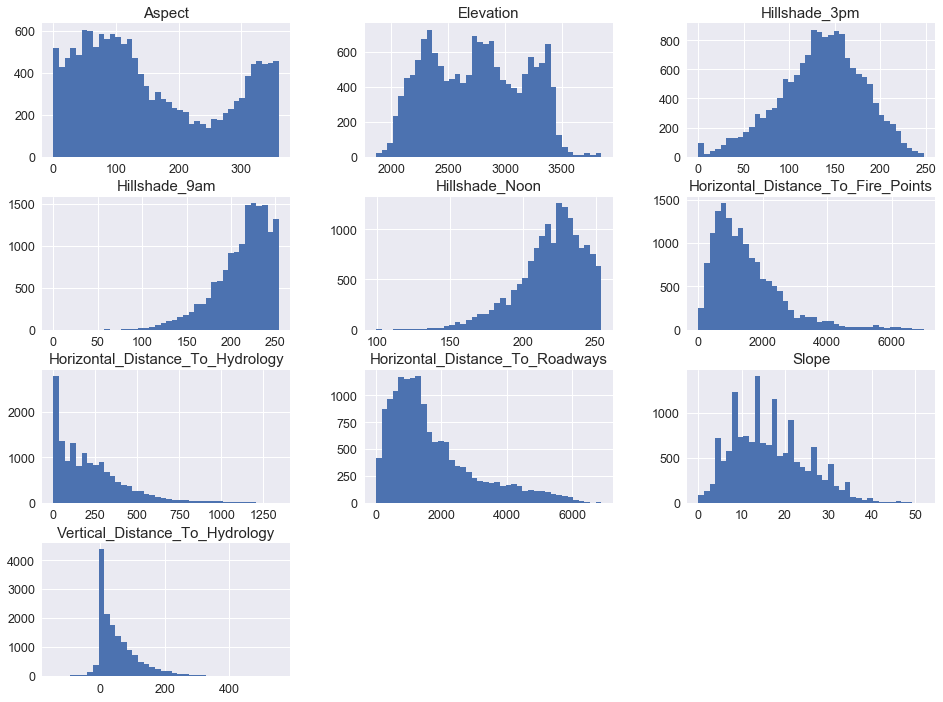

In [173]:
cols=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
train[cols].hist(figsize=(16,12),bins=40)
plt.show()

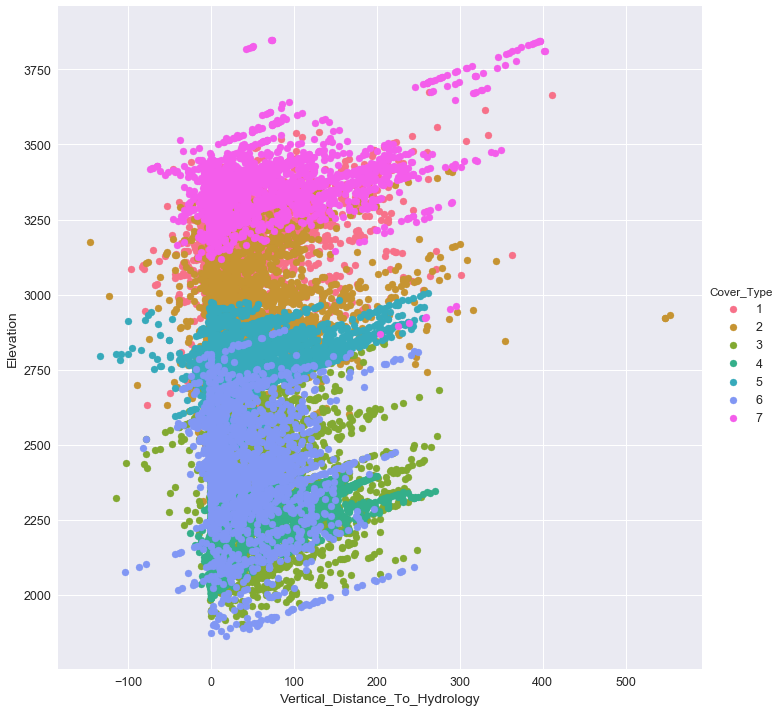

In [174]:
sns.FacetGrid(train, hue="Cover_Type", size=10) \
   .map(plt.scatter, "Vertical_Distance_To_Hydrology", "Elevation") \
   .add_legend()
plt.show()

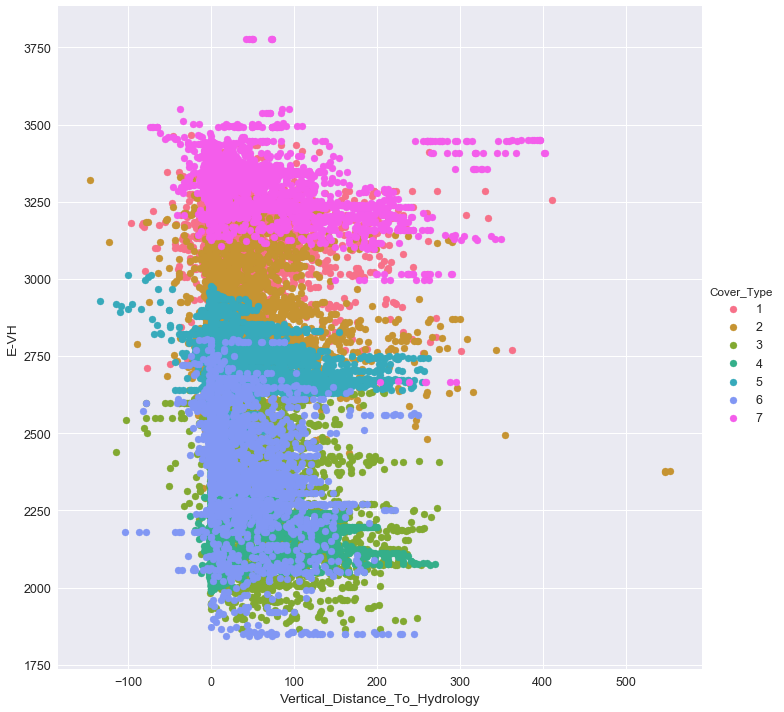

In [175]:
train['E-VH']=train['Elevation']-train['Vertical_Distance_To_Hydrology']
sns.FacetGrid(train, hue="Cover_Type", size=10) \
   .map(plt.scatter, "Vertical_Distance_To_Hydrology", "E-VH") \
   .add_legend()
plt.show()

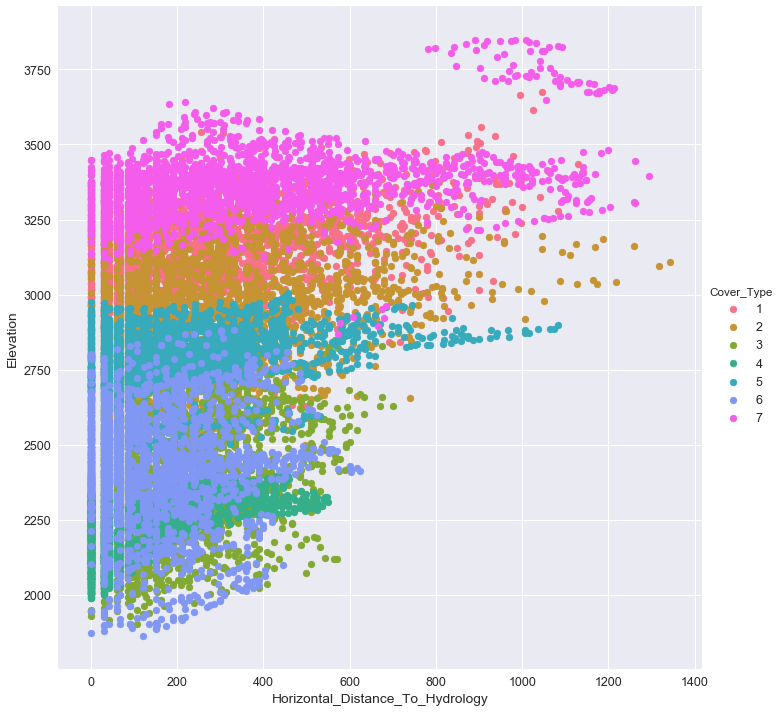

In [176]:
sns.FacetGrid(train, hue="Cover_Type", size=10) \
   .map(plt.scatter, "Horizontal_Distance_To_Hydrology", "Elevation") \
   .add_legend()
plt.show()

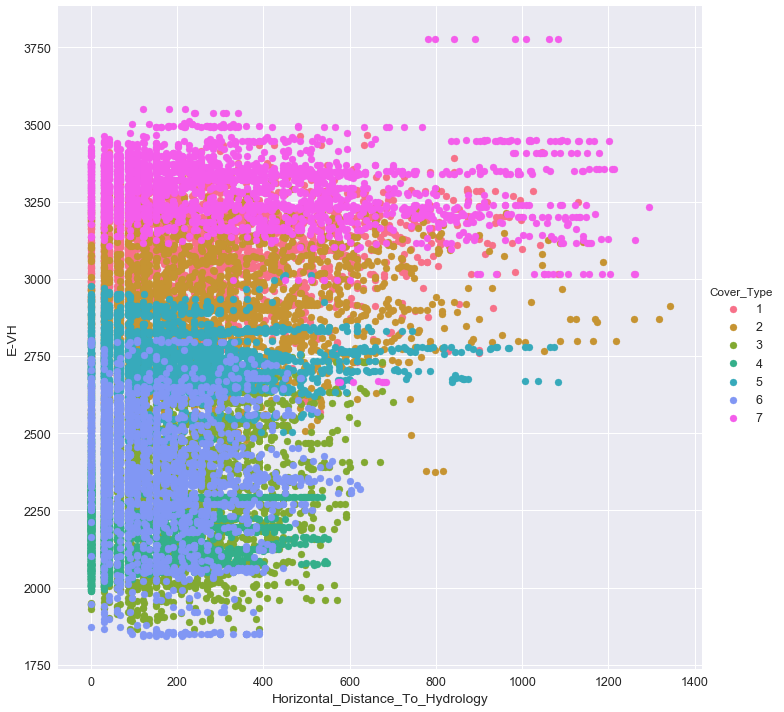

In [177]:
train['E-HH']=train['Elevation']-train['Horizontal_Distance_To_Hydrology']*.20
sns.FacetGrid(train, hue="Cover_Type", size=10) \
   .map(plt.scatter, "Horizontal_Distance_To_Hydrology", "E-VH") \
   .add_legend()
plt.show()

In [178]:
train.drop('E-HH', axis=1,inplace=True)
train.drop('E-VH', axis=1,inplace=True)

In [179]:
df=pd.concat((train,test)).reset_index(drop=True)
# convert dummies into a single column
# convert wilderness
wild_dummies = df[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]
wild = wild_dummies.idxmax(axis=1)
wild.name = 'Wilderness'

# convert soil
soil_dummies = df[df.columns[13:52]]
soil = soil_dummies.idxmax(axis=1)
soil.name = 'Soil'

t = pd.concat([df['Cover_Type'],wild,soil], axis=1)
t = t[t['Cover_Type'].isna()==False]
t.shape
t.Soil.value_counts()


C:\Users\Mrinal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


Vertical_Distance_To_Hydrology    11968
Soil_Type12                         510
Soil_Type17                         432
Soil_Type23                         284
Soil_Type29                         208
Soil_Type4                          205
Soil_Type38                         173
Soil_Type30                         149
Soil_Type14                         147
Soil_Type3                          115
Soil_Type2                           97
Soil_Type22                          89
Soil_Type20                          85
Soil_Type16                          84
Soil_Type6                           81
Soil_Type39                          73
Soil_Type32                          72
Soil_Type33                          68
Soil_Type31                          52
Soil_Type35                          41
Soil_Type5                           38
Soil_Type13                          28
Soil_Type24                          26
Soil_Type19                          21
Soil_Type40                          20


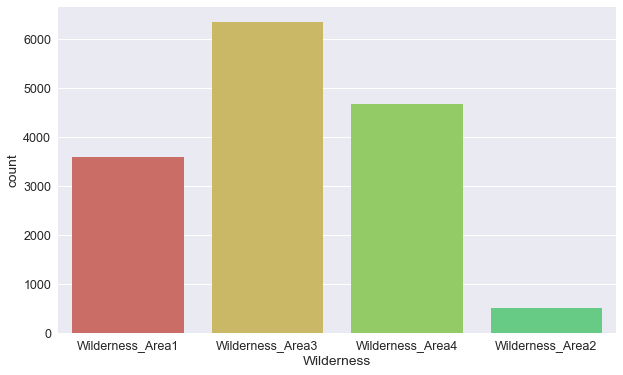

In [180]:
col=sns.color_palette("hls", 8)
plt.figure(figsize=(10,6))
sns.countplot(x='Wilderness',data=t, palette=col);

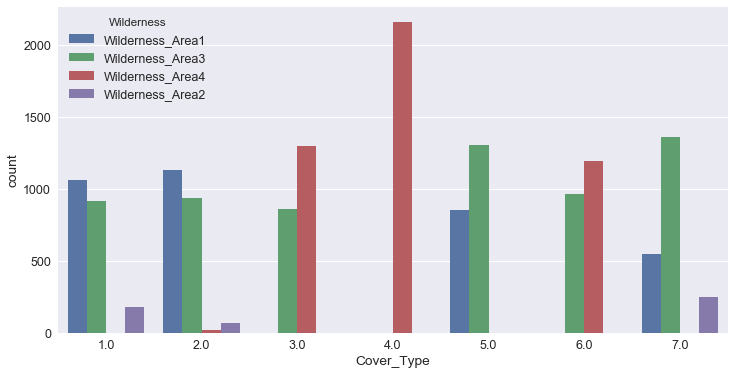

In [181]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cover_Type',data=t, hue='Wilderness');


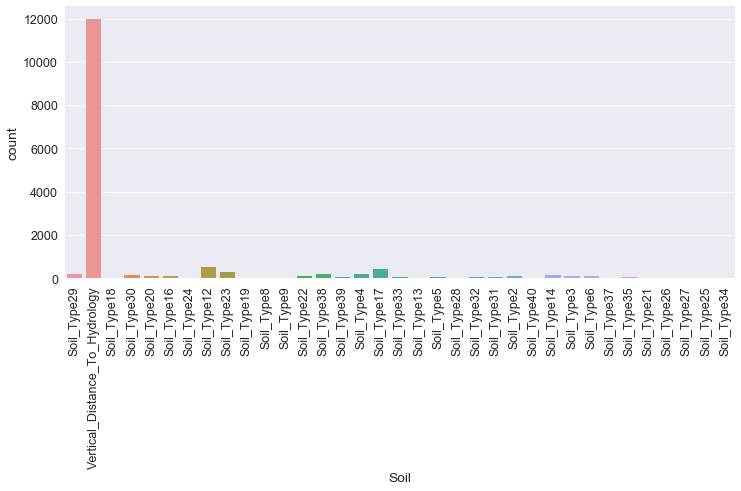

In [182]:
plt.figure(figsize=(12,5))
sns.countplot(x='Soil',data=t);
plt.xticks(rotation=90);

In [183]:
df[df.columns[13:52]].describe().T.sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
Soil_Type15,581012.0,0.000005,0.002272,0.0,0.0,0.0,0.0,1.0
Soil_Type7,581012.0,0.000181,0.013442,0.0,0.0,0.0,0.0,1.0
Soil_Type36,581012.0,0.000205,0.014310,0.0,0.0,0.0,0.0,1.0
Soil_Type8,581012.0,0.000308,0.017550,0.0,0.0,0.0,0.0,1.0
Soil_Type37,581012.0,0.000513,0.022641,0.0,0.0,0.0,0.0,1.0
Soil_Type25,581012.0,0.000816,0.028551,0.0,0.0,0.0,0.0,1.0
Soil_Type14,581012.0,0.001031,0.032092,0.0,0.0,0.0,0.0,1.0
Soil_Type21,581012.0,0.001442,0.037950,0.0,0.0,0.0,0.0,1.0
Soil_Type28,581012.0,0.001628,0.040318,0.0,0.0,0.0,0.0,1.0
Soil_Type27,581012.0,0.001869,0.043193,0.0,0.0,0.0,0.0,1.0


In [184]:
df.columns

Index(['Aspect', 'Cover_Type', 'Elevation', 'Hillshade_3pm', 'Hillshade_9am',
       'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Slope', 'Soil_Type1', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type2',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type3', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9',
       'Vertical_Distance_To_Hydrology', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wi

In [185]:
df=pd.concat([df,wild,soil], axis=1)

In [186]:
df.columns

Index(['Aspect', 'Cover_Type', 'Elevation', 'Hillshade_3pm', 'Hillshade_9am',
       'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Slope', 'Soil_Type1', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type2',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type3', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9',
       'Vertical_Distance_To_Hydrology', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wi

In [187]:
boxplots = df[['Elevation', 'Aspect', 'Slope',
               'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
               'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Cover_Type','Wilderness','Soil']]

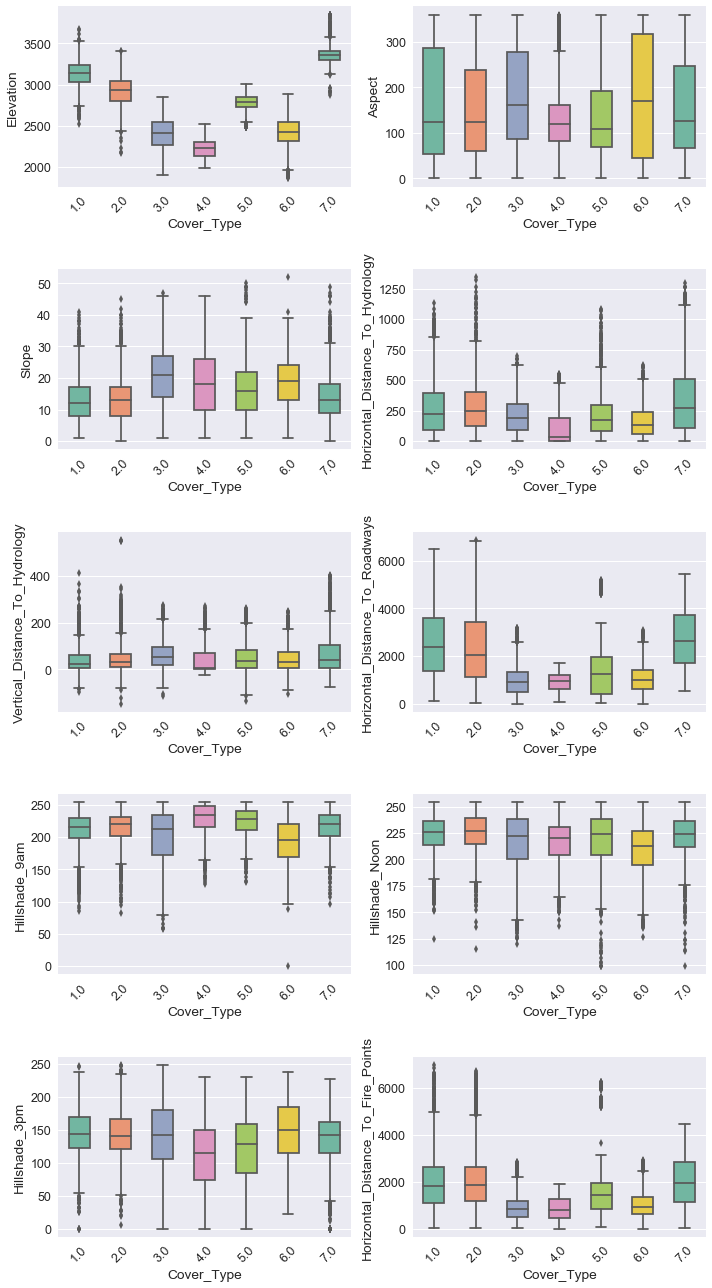

In [188]:
cmap = sns.color_palette("Set2")

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(10, 18))
a = [i for i in axes for i in i]
for i, ax in enumerate(a):
    sns.boxplot(x='Cover_Type', y=boxplots.columns[i], data=boxplots, palette=cmap, width=0.5, ax=ax);

# rotate x-axis for every single plot
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# set spacing for every subplot, else x-axis will be covered
plt.tight_layout()

C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


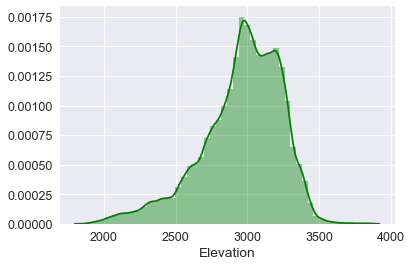

In [189]:
ax = sns.distplot(df['Elevation'], color='green')
plt.show()

C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


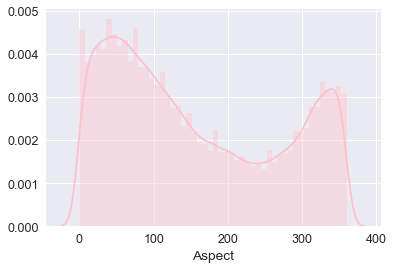

In [190]:
ax = sns.distplot(df['Aspect'], color='pink')
plt.show()

C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


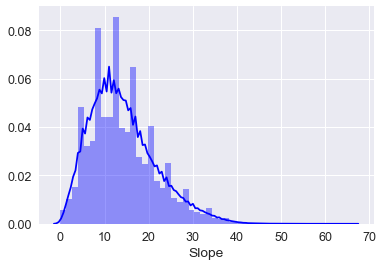

In [191]:
ax = sns.distplot(df['Slope'], color='blue')
plt.show()

C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


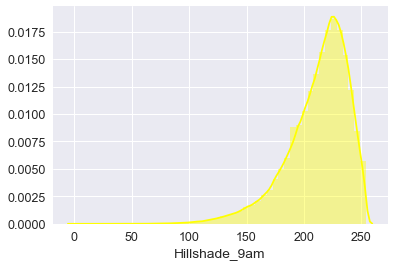

In [192]:
ax = sns.distplot(df['Hillshade_9am'], color='yellow')
plt.show()

C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


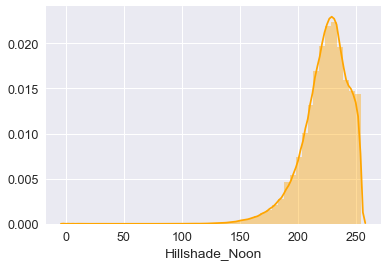

In [193]:
ax = sns.distplot(df['Hillshade_Noon'], color='orange')
plt.show()

C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


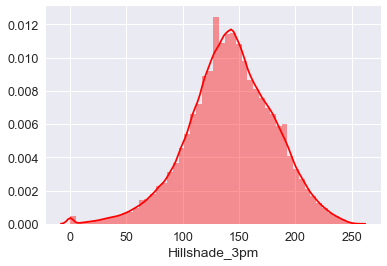

In [194]:
ax = sns.distplot(df['Hillshade_3pm'], color='red')
plt.show()

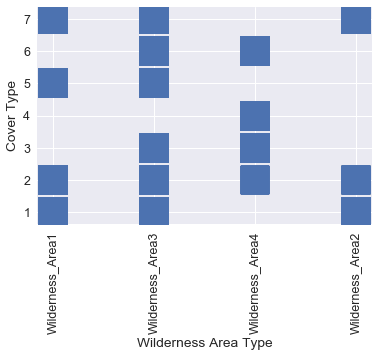

In [195]:
# Wilderness area to Cover type mapping

ax = plt.scatter(x=df['Wilderness'], y=df['Cover_Type'],s=800,marker='s')
plt.xlabel('Wilderness Area Type')
plt.xticks(rotation=90);
plt.ylabel('Cover Type')
plt.show()

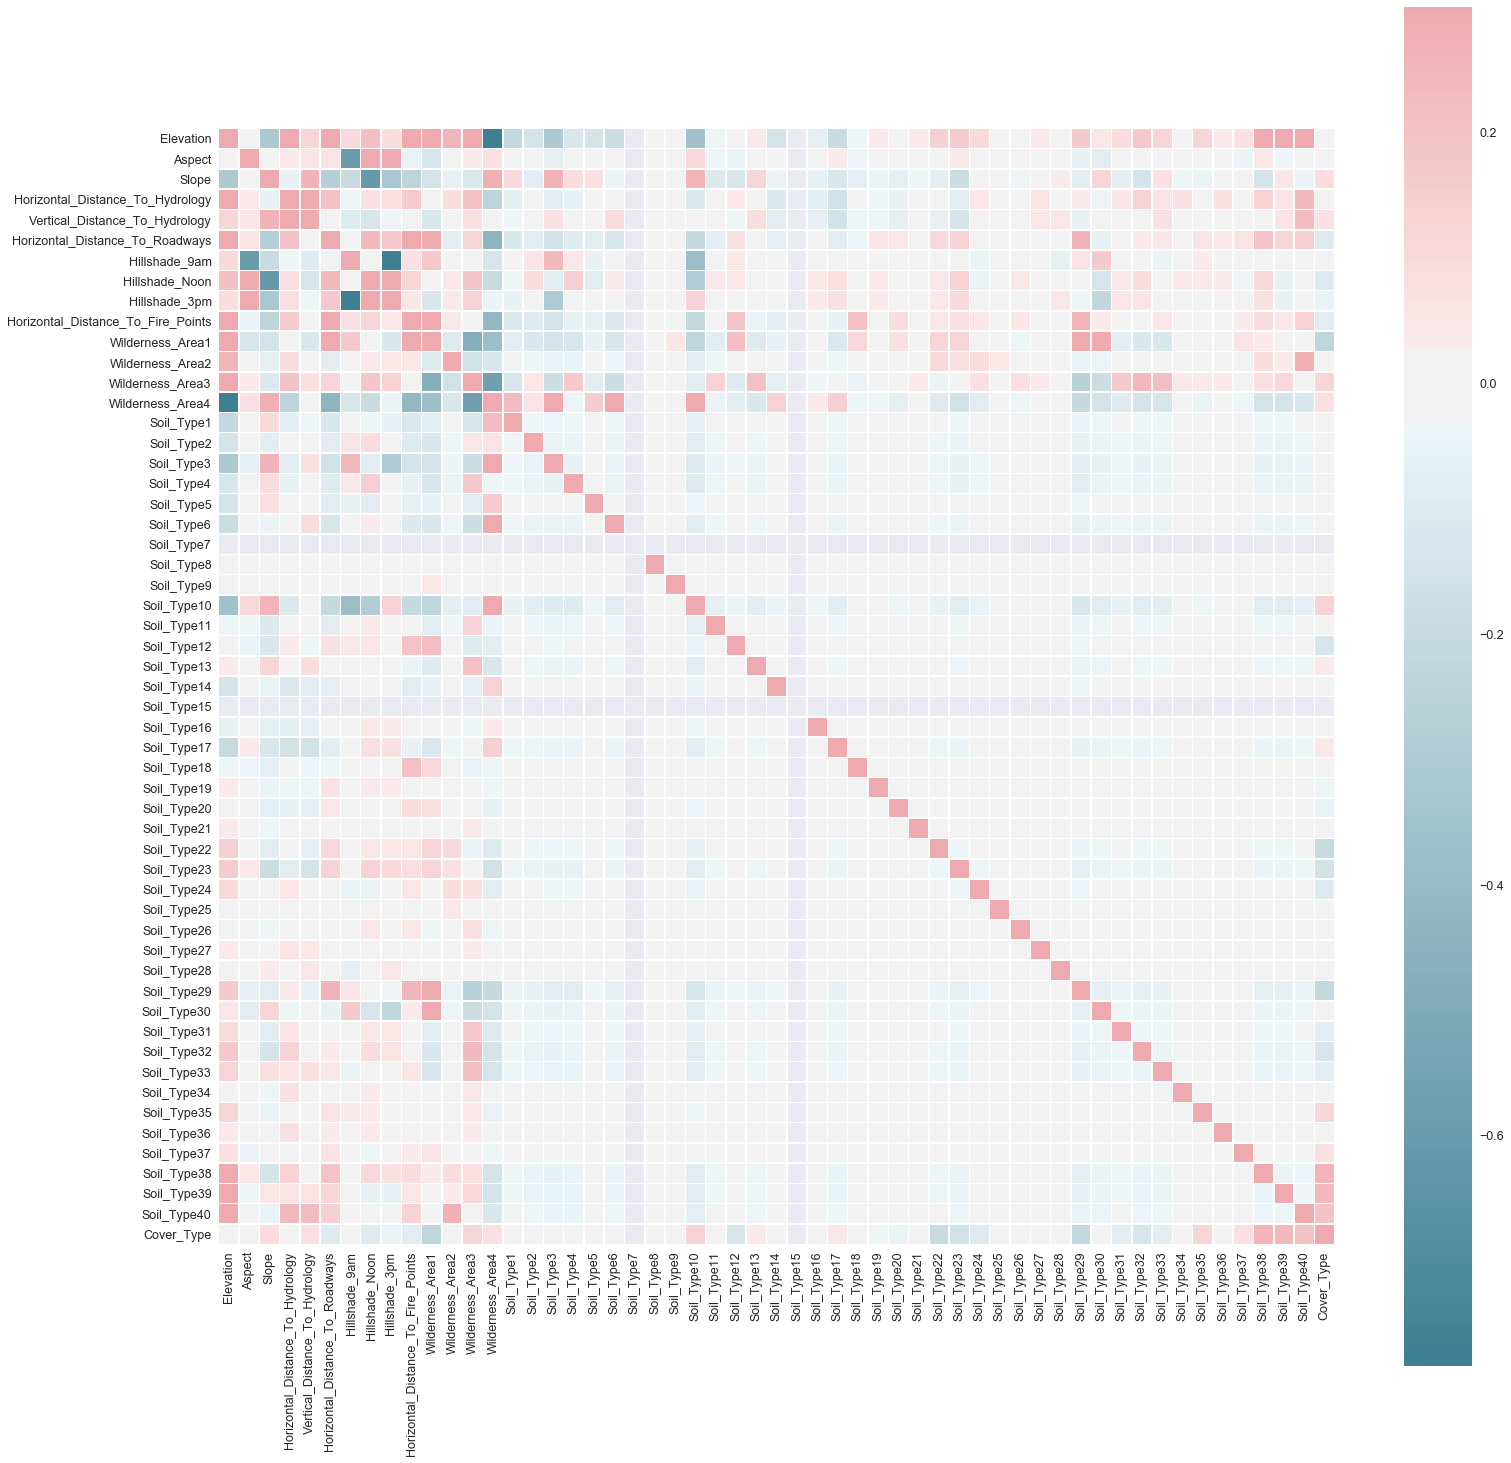

In [196]:
import seaborn as sns


import matplotlib.pyplot as plt


corr = train.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

In [197]:
corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,...,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,...,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,...,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,...,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386,...,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144,...,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098,...,0.096261,-0.013129,0.034149,0.034638,0.029261,-0.035385,0.104682,-0.058979,-0.008203,-0.098905
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162,...,0.058244,0.024496,0.018298,0.000662,0.004545,-0.028055,0.069262,-0.056383,0.019158,-0.053399
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000,...,0.017055,0.049053,-0.009914,0.004767,-0.009244,0.033256,0.090648,0.047912,0.128467,-0.089389


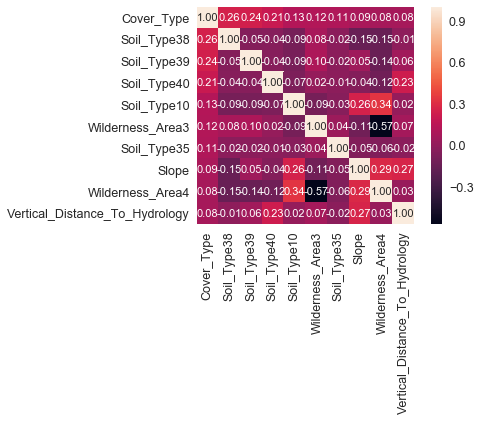

In [198]:
sns.set(font_scale=1.25)
corrmat=train.corr()
cols = corrmat.nlargest(10, 'Cover_Type')['Cover_Type'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.2f', annot_kws={'size':11},
           yticklabels=cols.values,
           xticklabels=cols.values)

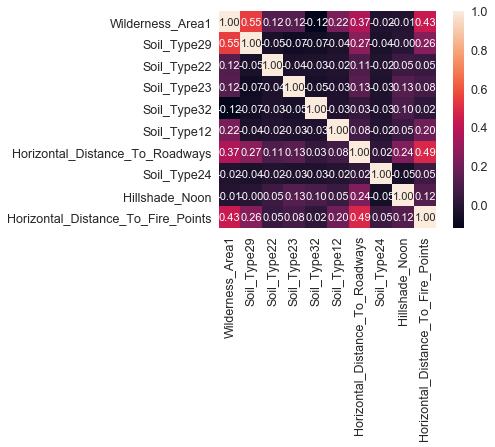

In [199]:
sns.set(font_scale=1.25)
corrmat=train.corr()
cols = corrmat.nsmallest(10, 'Cover_Type')['Cover_Type'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.2f', annot_kws={'size':11},
           yticklabels=cols.values,
           xticklabels=cols.values)

In [200]:
corr['Cover_Type'].sort_values(ascending=False)

Cover_Type                            1.000000
Soil_Type38                           0.257810
Soil_Type39                           0.240384
Soil_Type40                           0.205851
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Slope                                 0.087722
Wilderness_Area4                      0.075774
Vertical_Distance_To_Hydrology        0.075647
Soil_Type37                           0.071210
Soil_Type17                           0.042453
Soil_Type13                           0.040528
Soil_Type5                            0.027692
Soil_Type36                           0.025726
Soil_Type2                            0.022627
Soil_Type14                           0.022019
Elevation                             0.016090
Soil_Type1                            0.015069
Wilderness_Area2                      0.014994
Soil_Type11                           0.010228
Soil_Type16  

In [201]:
train.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )
test.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )

In [202]:
c = np.array(list(train.Cover_Type.values))
def plo(a,b):
    
    plt.scatter(a,b, c = c, s=10)
    plt.xlabel(a.name)
    plt.ylabel(b.name)
   


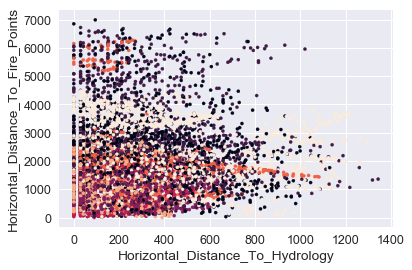

In [203]:
plo(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Fire_Points)

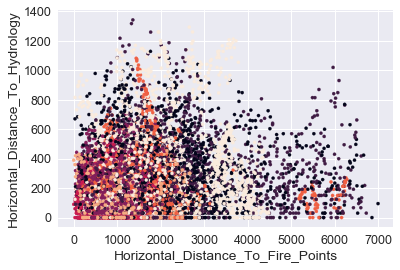

In [204]:
plo(train.Horizontal_Distance_To_Fire_Points, train.Horizontal_Distance_To_Hydrology)

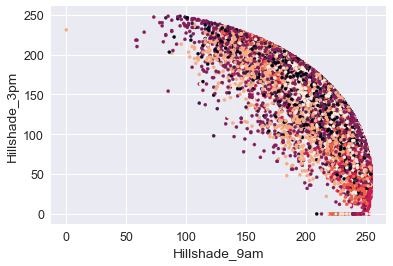

In [205]:
plo(train.Hillshade_9am, train.Hillshade_3pm)

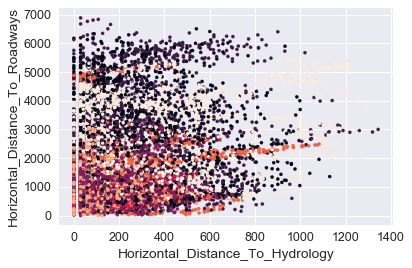

In [206]:
plo(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Roadways)

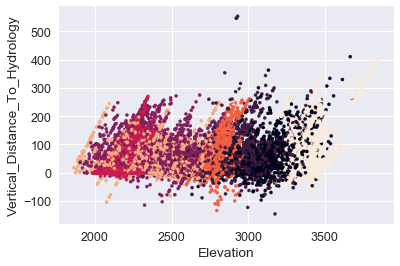

In [207]:
plo(train.Elevation, train.Vertical_Distance_To_Hydrology)

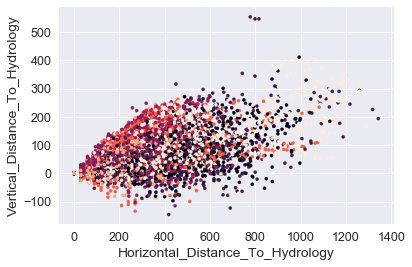

In [208]:
plo(train.Horizontal_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

In [209]:
type(train)
type(test)

pandas.core.frame.DataFrame

In [210]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dtype

In [211]:
def features(data):
    data['HHydro_Fire'] = (data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points'])
    data['Neg_HHydro_Fire'] = (data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points'])
    data['Mean_HHydro_Fire'] = (data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points'])/2
    data['Mean_Neg_HHydro_Fire'] = (data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points'])/2
    data['Mean_Fire_HHydro-rev']=(data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Hydrology']) / 2
    
    data['HHydro_Road'] = (data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways'])
    data['Neg_HHydro_Road'] = (data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways'])
    data['Mean_HHydro_Road'] = (data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways'])/2
    data['Mean_Neg_HHydro_Road'] = (data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways'])/2

    data['Fire_Road'] = (data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways'])
    data['Neg_Fire_Road'] = (data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways'])
    data['Mean_Fire_Road'] = (data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways'])/2
    data['Mean_Neg_Fire_Road'] = (data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways'])/2

    data['Elevation_V'] = data['Elevation']+data['Vertical_Distance_To_Hydrology']
    data['Neg_Elevation_V'] = data['Elevation']-data['Vertical_Distance_To_Hydrology']

    data['Mean_Hillshade'] =  (data['Hillshade_9am']  + data['Hillshade_Noon'] + data['Hillshade_3pm'] ) / 3

    data['Slope_Pyth'] = np.sqrt(data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)
    data['Mean_Fire_Hydro_Road']=(data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Roadways']) / 3

    data["Abs_VHydro"] = abs(data['Vertical_Distance_To_Hydrology'])

    data['Neg_Elevation_HHydro'] = data.Elevation-data.Horizontal_Distance_To_Hydrology*0.2
    data['Neg_Elevation_VHydro'] = data.Elevation-data.Vertical_Distance_To_Hydrology

    return data

In [212]:
train=features(train)

In [213]:
test=features(test)

In [214]:
type(train)
type(test)

pandas.core.frame.DataFrame

In [218]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'HHydro_Fire', 'Neg_HHydro

In [216]:

y_train_T = train['Cover_Type']
X_train=train
X_train.drop(columns = 'Cover_Type', inplace=True)
X_test=test
all_data=pd.concat((train,test)).reset_index(drop=True)

In [141]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf.fit(X_train,y_train_T)

z = clf.feature_importances_

df = pd.DataFrame()
print(len(z))
print(len(list(X_train.columns.values)))

df["values"] = z
df['column'] = list(X_train.columns.values)
# Sort then descendingly to get the worst features at the end
df.sort_values(by='values', ascending=False, inplace = True)
df.head(100)

73
73


,values,column
0,0.076002,Elevation
72,0.069892,Neg_Elevation_VHydro
65,0.065318,Elevation_V
66,0.049502,Neg_Elevation_V
71,0.046972,Neg_Elevation_HHydro
10,0.026454,Wilderness_Area1
16,0.025390,Soil_Type3
58,0.024145,Neg_HHydro_Road
13,0.023556,Wilderness_Area4
22,0.023248,Soil_Type10


In [142]:
X_train.shape,X_test.shape, y_train_T.shape

((15120, 73), (565892, 73), (15120,))

In [143]:
df.values=pd.to_numeric(df['values'])
cols=df[df['values']<0.0001].column
cols=np.array(cols)
list(cols)

['Soil_Type36', 'Soil_Type9', 'Soil_Type25', 'Soil_Type8']

In [144]:
X_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'HHydro_Fire', 'Neg_HHydro

In [145]:
X_train=X_train.drop(columns=list(cols),  axis = 1 )
X_test=X_test.drop(columns=list(cols),  axis = 1)

In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition

scaler = StandardScaler()
scaler.fit(X_train)
x_train = pd.DataFrame(scaler.transform(X_train))
x_test = pd.DataFrame(scaler.transform(X_test))
x_train.columns=X_train.columns
x_test.columns=X_test.columns
y_train=y_train_T

In [147]:
#Here we run a GridSearch to find best hyperparameters

In [62]:
#Uncomment to run code

#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#from sklearn.ensemble import GradientBoostingClassifier

#from xgboost import XGBClassifier

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import roc_auc_score

#param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators':[900, 1100, 1300, 1500]}

#tree = GridSearchCV(ExtraTreesClassifier(random_state=0), param_grid, cv=5)

#tree.fit(x_train, y_train)
#tree.best_params_

In [74]:
clf = ExtraTreesClassifier(n_estimators=1300, random_state=0, criterion='entropy')
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)


out = pd.DataFrame()
out['Id'] = test_id
out['Cover_Type'] = predictions
out.to_csv('RunForrestRunF.csv', index=False)
out.head(5)

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1


In [220]:
#Test Accuracy:-0.81926

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=14)
clf.fit(X_train, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [76]:
#To check confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

y_pred = clf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix


array([[591,  79,   0,   0,  14,   1,  26],
       [115, 528,  13,   0,  39,  15,   6],
       [  0,   3, 656,  23,   5,  42,   0],
       [  0,   0,  11, 685,   0,   8,   0],
       [  0,   7,   6,   0, 691,   3,   0],
       [  0,   1,  43,  15,   4, 645,   0],
       [ 10,   0,   0,   0,   0,   0, 705]], dtype=int64)

In [77]:
#Here we investigate the relative feature importance for each class.

from sklearn.preprocessing import scale
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out


In [78]:
z = clf.feature_importances_
r=class_feature_importance(x_train, y_train, z)

In [80]:
r=pd.DataFrame(r)
r.head()

,1,2,3,4,5,6,7
0,0.069996,0.032016,-0.064857,-0.097202,0.006927,-0.060263,0.113383
1,0.000361,-0.000723,0.002203,-0.002408,-0.002422,0.003103,-0.000114
2,-0.003853,-0.003500,0.004693,0.002237,0.000254,0.002825,-0.002655
3,0.003207,0.004382,-0.001192,-0.008878,-0.001326,-0.004857,0.008665
4,-0.001865,-0.000712,0.002476,-0.002081,-0.000039,-0.001181,0.003402


In [221]:
#Building a model with observations just from Type 1&2 leads to a similar error rate. Let us see if we can build two models, 
#1 for Class 1 vs the rest
#2 for Class 2 vs the rest
# and set these tests to reduce the False Negative Rate, so it doesnt incorrectly classify 1 as not 1 (or 2 as not 2)

#After many iterations the most stable threshold was between 0.5-0.8. Above this both the classifiers label most of the observations as 1 and 2.
#However this method did not change the test accuracy. Code for this is provided in the attached notebook 'One_Two_classifiers'.


In [222]:
#Back to the drawing board - More to come.